## Import Library

In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [37]:
url = "https://raw.githubusercontent.com/nabhylanr/ISPU-Classification/main/data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(merged).csv"
df = pd.read_csv(url)

## Exploratory Data Analysis

### Informasi Dataset

In [38]:
df.head(10)

,parameter_pencemar_kritis,kategori,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max
0,O3,SEDANG,201105,5.0,1.0,DKI1,71,NaN,18,54,88,31,88
1,O3,SEDANG,201105,5.0,2.0,DKI4,61,NaN,19,35,98,29,98
2,PM10,SEDANG,201105,5.0,3.0,DKI1,69,NaN,22,31,69,28,69
3,PM10,SEDANG,201105,5.0,4.0,DKI4,63,NaN,18,26,47,17,63
4,PM10,SEDANG,201105,5.0,5.0,DKI4,76,NaN,17,28,63,20,76
5,O3,SEDANG,201105,5.0,6.0,DKI2,58,NaN,22,36,65,23,65
6,O3,SEDANG,201105,5.0,7.0,DKI4,63,NaN,22,38,66,14,66
7,PM10,SEDANG,201105,5.0,8.0,DKI4,56,NaN,15,42,50,13,56
8,O3,TIDAK SEHAT,201105,5.0,9.0,DKI4,51,NaN,9,20,153,27,153
9,O3,TIDAK SEHAT,201105,5.0,10.0,DKI3,78,NaN,20,29,137,24,137


Fitur:
1. periode_data : Penjelasan Periode Data 1 Bulan Sekali
2. bulan : adalah bulan penggambilan data Indeks Standar Pencemar Udara (ISPU)
3. tanggal : adalah tanggal pengambilan data Indeks Standar Pencemar Udara (ISPU)
4. stasiun : adalah lokasi penempatan alat pemantauan udara
5. pm_sepuluh : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter PM10 (nama salah satu nama parameter yang dipantau) yaitu Partikulat dengan ukuran di bawah 10 mikron
6. pm_duakomalima : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter PM2.5 (nama salah satu nama parameter yang dipantau), yaitu Partikulat dengan ukuran di bawah 2.5 mikron
7. sulfur_dioksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter sulfur dioksida/ SO2 (nama salah satu nama parameter yang dipantau)
8. karbon_monoksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter karbon monoksida/ CO (nama salah satu nama parameter yang dipantau)
9. ozon : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter ozon/ O3 (nama salah satu nama parameter yang dipantau)
10. nitrogen_dioksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter nitrogen dioksida/ NO2 (nama salah satu nama parameter yang dipantau)
11. max : adalah nilai tertinggi hasil pengukuran Indeks Standar Pencemar Udara (ISPU) dari beberapa parameter yang dipantau pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal pengukuran tertentu
12. parameter_pencemar_kritis : adalah nama parameter yang dipantau yang hasil nilai Indeks Standar Pencemar Udara (ISPU) nya paling tinggi pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal tertentu
13. kategori : adalah kategori hasil pengukuran Indeks Standar Pencemar Udara (ISPU) pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal tertentu

In [39]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 13403
Jumlah kolom: 13


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13403 entries, 0 to 13402
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parameter_pencemar_kritis  13252 non-null  object 
 1   kategori                   13401 non-null  object 
 2   periode_data               13403 non-null  int64  
 3   bulan                      13402 non-null  float64
 4   tanggal                    13402 non-null  float64
 5   stasiun                    13403 non-null  object 
 6   pm_sepuluh                 13118 non-null  object 
 7   pm_duakomalima             6758 non-null   float64
 8   sulfur_dioksida            13235 non-null  object 
 9   karbon_monoksida           13320 non-null  object 
 10  ozon                       13291 non-null  object 
 11  nitrogen_dioksida          13301 non-null  object 
 12  max                        13394 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usag

In [47]:
num_cols = [
    'pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida',
    'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max'
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13403 entries, 0 to 13402
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parameter_pencemar_kritis  13252 non-null  object 
 1   kategori                   13401 non-null  object 
 2   periode_data               13403 non-null  int64  
 3   bulan                      13402 non-null  float64
 4   tanggal                    13402 non-null  float64
 5   stasiun                    13403 non-null  object 
 6   pm_sepuluh                 12653 non-null  float64
 7   pm_duakomalima             6758 non-null   float64
 8   sulfur_dioksida            13029 non-null  float64
 9   karbon_monoksida           13092 non-null  float64
 10  ozon                       13068 non-null  float64
 11  nitrogen_dioksida          13032 non-null  float64
 12  max                        13386 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usag

In [41]:
df.describe()

,periode_data,bulan,tanggal,pm_duakomalima
count,13403.000000,13402.000000,13402.000000,6758.000000
mean,201987.554055,6.340621,15.745187,76.014501
std,396.112628,3.389080,8.778186,23.975428
min,201101.000000,1.000000,1.000000,10.000000
25%,201701.000000,3.000000,8.000000,60.000000
50%,202104.000000,6.000000,16.000000,77.000000
75%,202310.000000,9.000000,23.000000,91.000000
max,202509.000000,12.000000,31.000000,287.000000


### Distribution Target Variable (Kategori)

In [42]:
print("Distribusi target variabel")
print(df['kategori'].value_counts())

print("\nPersentase:")
print(df['kategori'].value_counts(normalize=True) * 100)

Distribusi target variabel
kategori
SEDANG                9017
TIDAK SEHAT           2278
BAIK                  1764
SANGAT TIDAK SEHAT     188
TIDAK ADA DATA         122
O3                      31
BERBAHAYA                1
Name: count, dtype: int64

Persentase:
kategori
SEDANG                67.286023
TIDAK SEHAT           16.998731
BAIK                  13.163197
SANGAT TIDAK SEHAT     1.402880
TIDAK ADA DATA         0.910380
O3                     0.231326
BERBAHAYA              0.007462
Name: proportion, dtype: float64


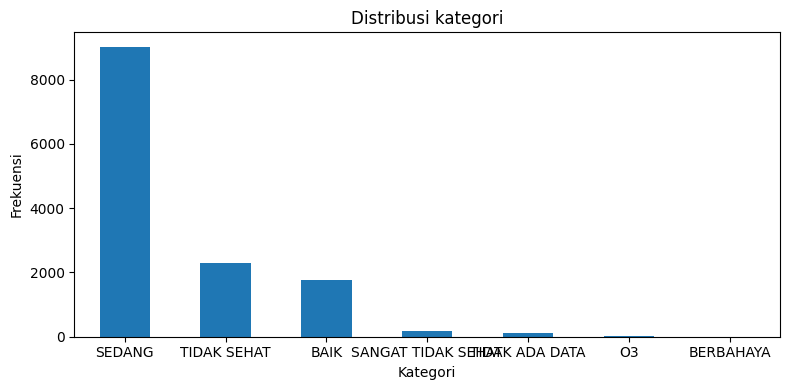

In [43]:
plt.figure(figsize=(8, 4))
df['kategori'].value_counts().plot(kind='bar')
plt.title('Distribusi kategori')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Distribution Chart

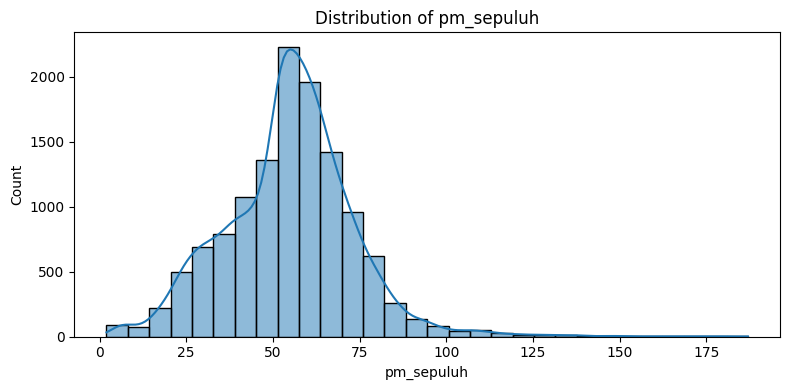

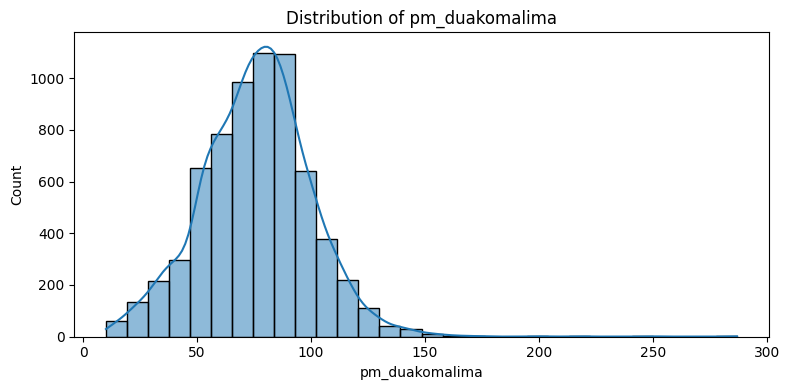

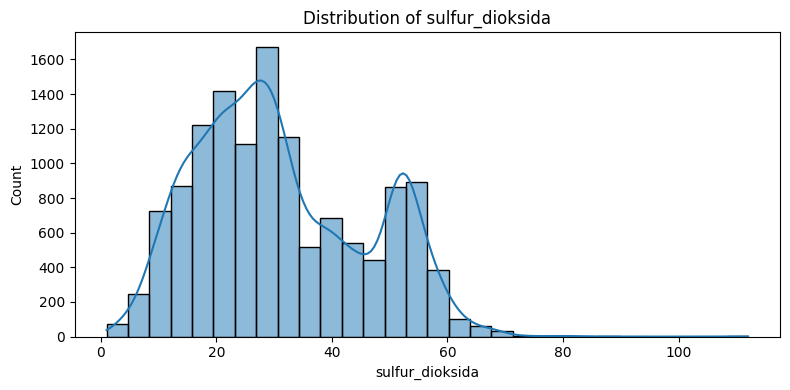

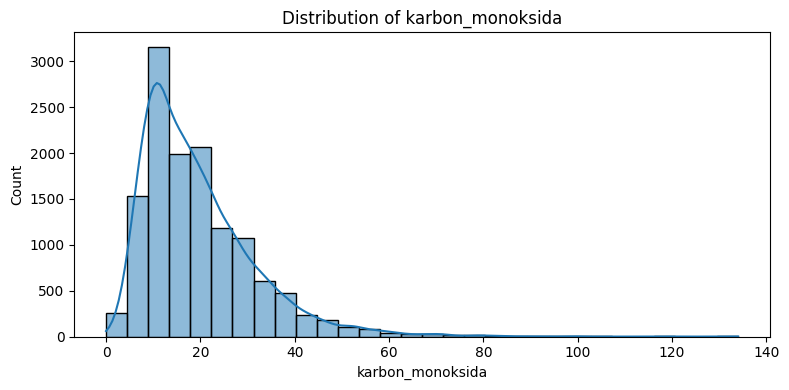

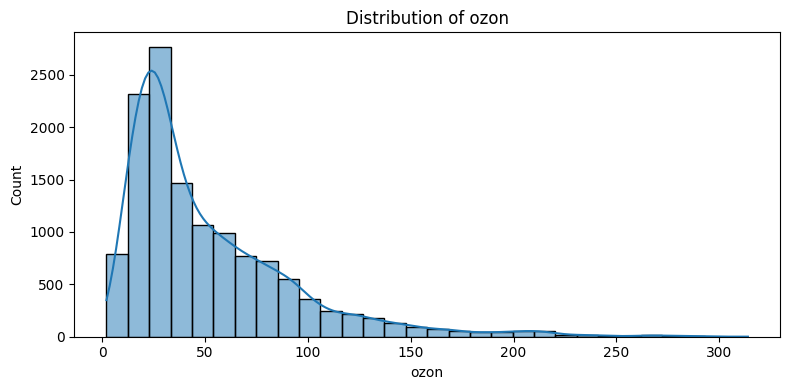

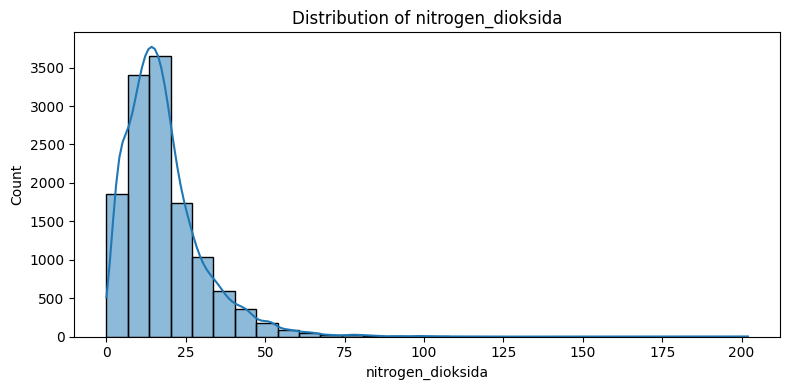

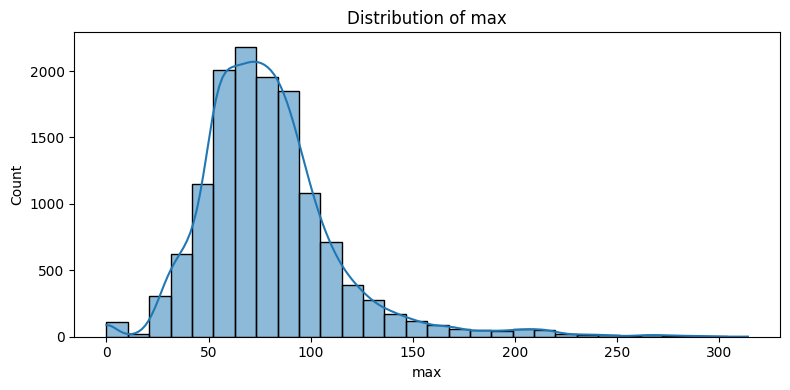

In [49]:
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

### Outlier

In [50]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
outlier_count = outlier_mask.sum()

print("Jumlah outlier per fitur:")
print(outlier_count)

Jumlah outlier per fitur:
pm_sepuluh           367
pm_duakomalima        77
sulfur_dioksida        9
karbon_monoksida     429
ozon                 580
nitrogen_dioksida    623
max                  675
dtype: int64


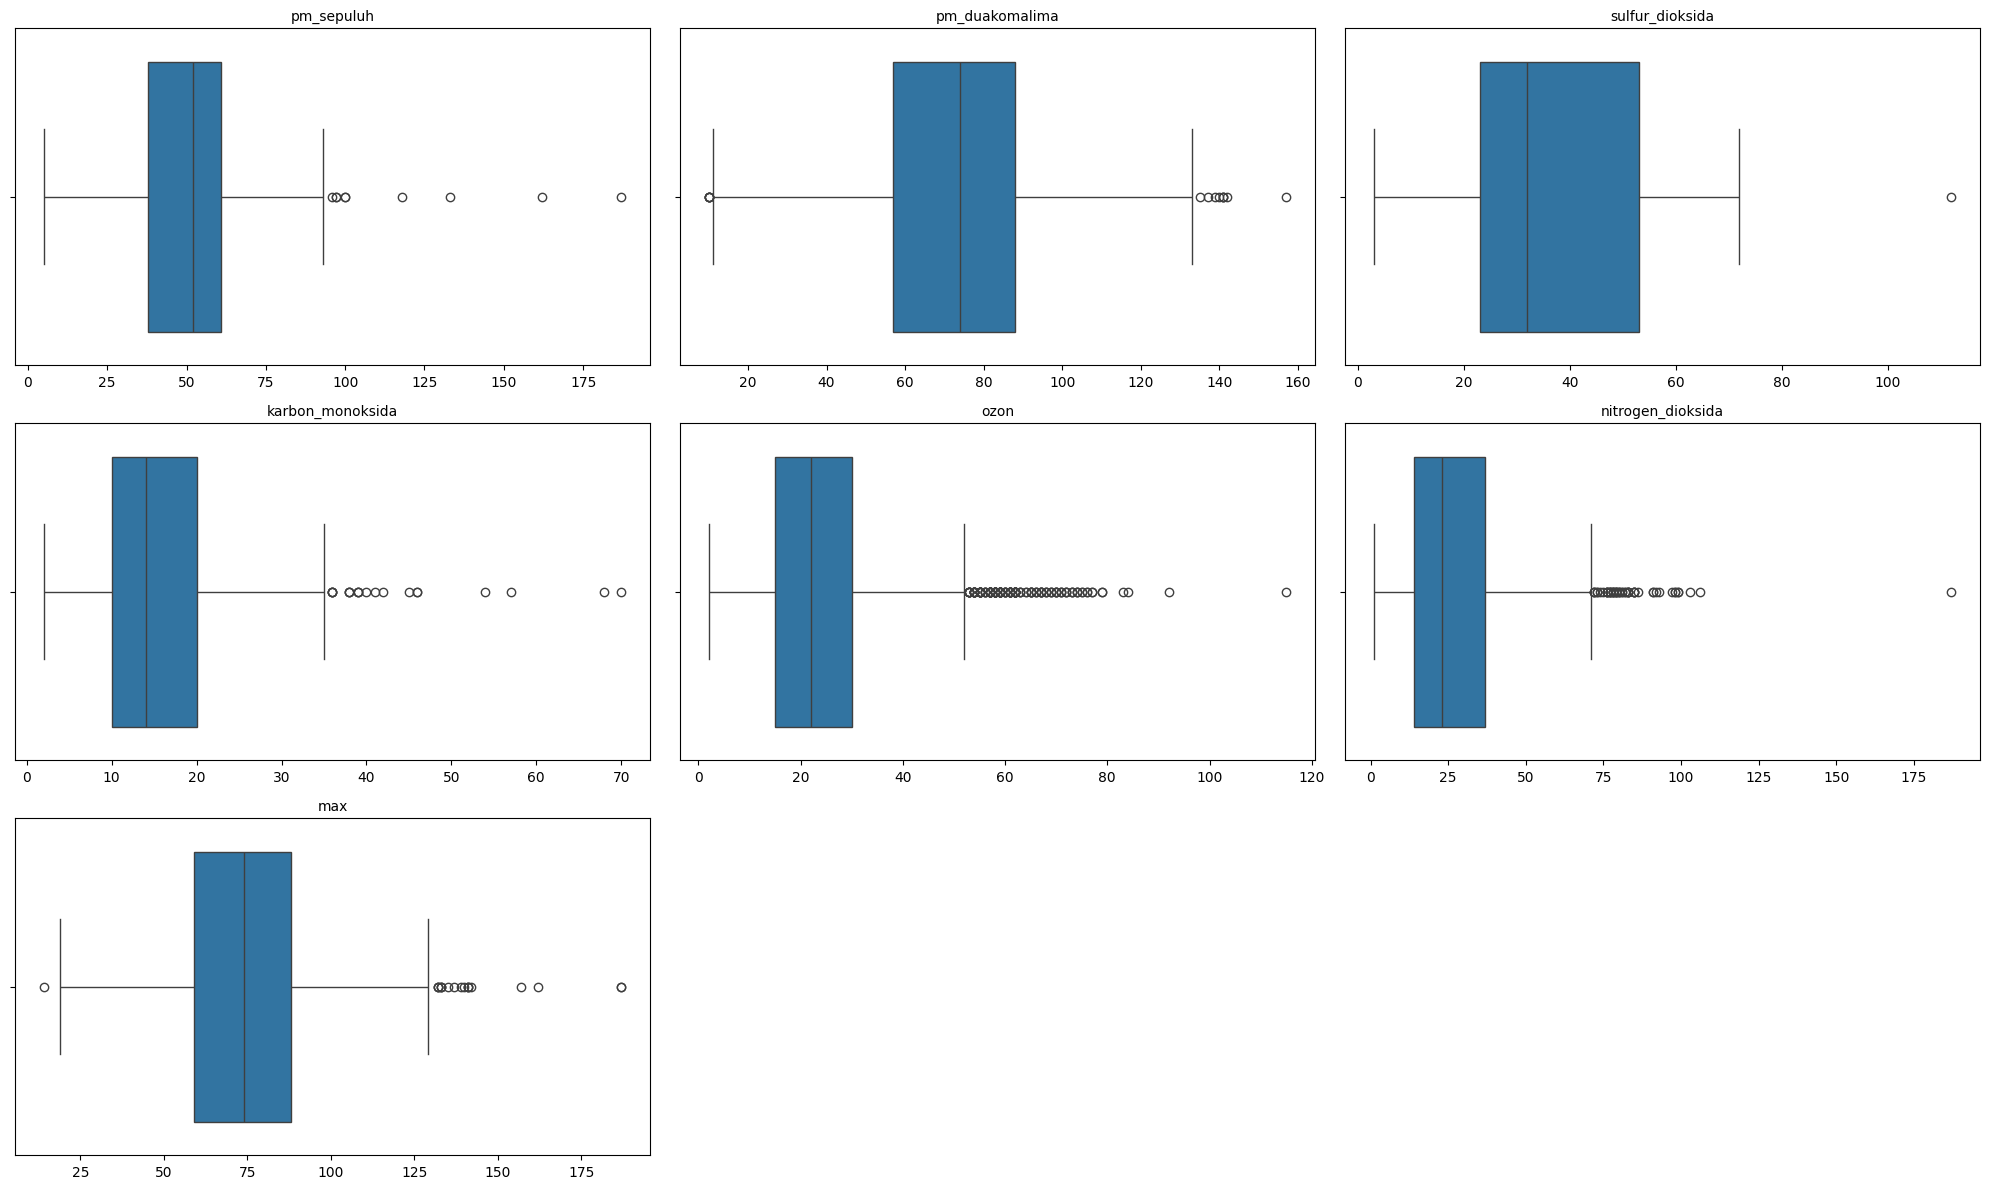

In [51]:
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=X[col])
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

### Stasiun Type Plot

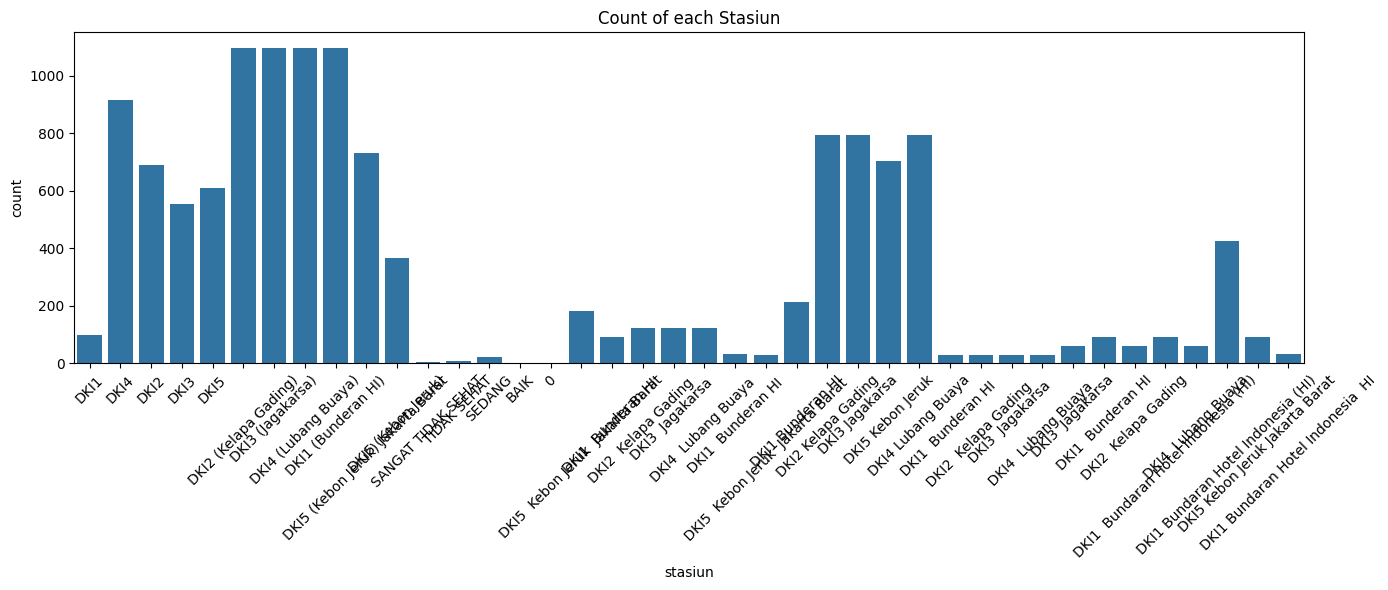

In [52]:
if 'stasiun' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.countplot(x='stasiun', data=df)
    plt.title('Count of each Stasiun')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Corr Heatmap

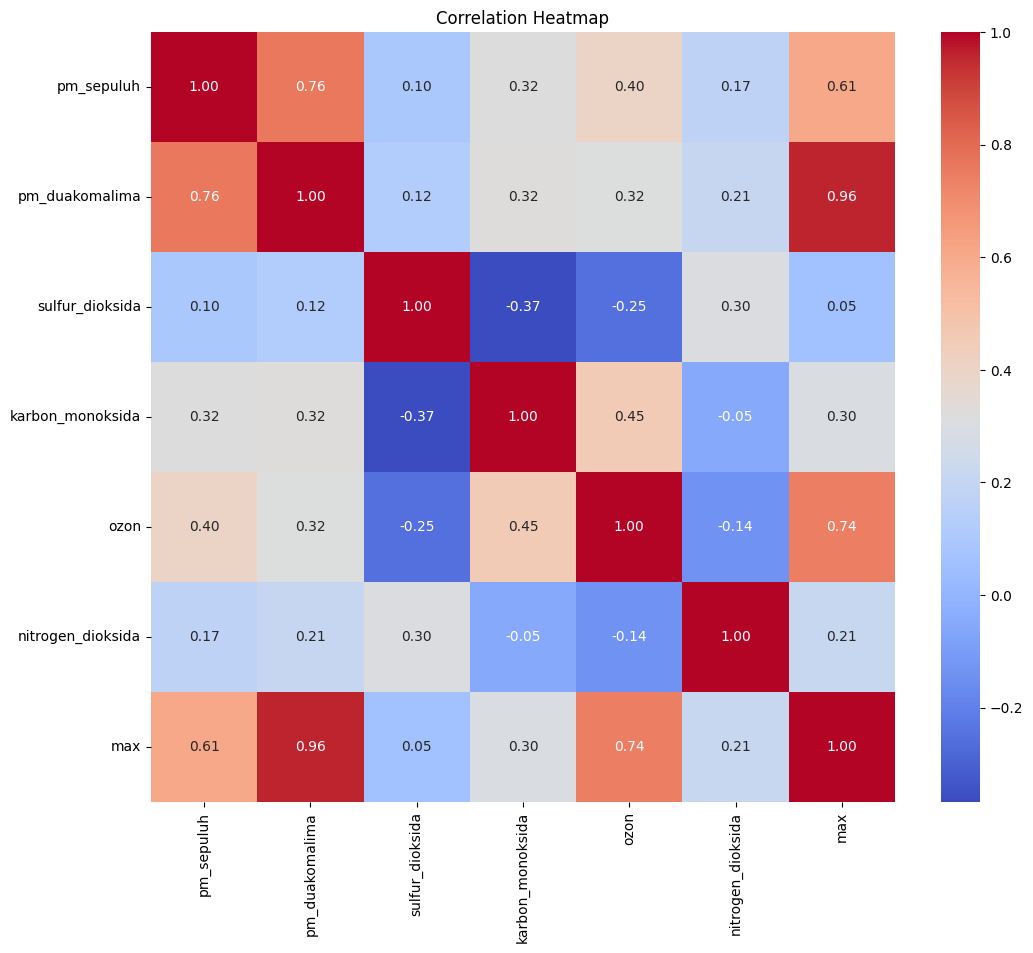

In [53]:
if len(num_cols) >= 4:
    plt.figure(figsize=(12, 10))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

## Preprocessing

### Cleaning

In [54]:
# drop duplicate
df = df.drop_duplicates()

# drop kategori yang kosong
df = df.dropna(subset=['kategori'])

# drop fitur yang tidak diperlukan
df = df.drop(['periode_data','bulan','tanggal','stasiun'], axis=1)

# drop kategori tidak ada data
df = df[df['kategori'] != 'TIDAK ADA DATA']

# drop kategori < 2
counts = df['kategori'].value_counts()
rare = counts[counts < 2].index
df = df[~df['kategori'].isin(rare)]

In [55]:
print("Distribusi target variabel")
print(df['kategori'].value_counts())

print("\nPersentase:")
print(df['kategori'].value_counts(normalize=True) * 100)

Distribusi target variabel
kategori
SEDANG                9017
TIDAK SEHAT           2278
BAIK                  1764
SANGAT TIDAK SEHAT     188
O3                      31
Name: count, dtype: int64

Persentase:
kategori
SEDANG                67.909324
TIDAK SEHAT           17.156198
BAIK                  13.285133
SANGAT TIDAK SEHAT     1.415876
O3                     0.233469
Name: proportion, dtype: float64


### Splitting

In [56]:
X = df.drop('kategori', axis=1)
y = df['kategori']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Imputasi

In [57]:
print("Missing value X_train:")
print(X_train.isnull().sum())

print("\nMissing value X_test:")
print(X_test.isnull().sum())

Missing value X_train:
parameter_pencemar_kritis      37
pm_sepuluh                    490
pm_duakomalima               5266
sulfur_dioksida               201
karbon_monoksida              153
ozon                          170
nitrogen_dioksida             186
max                             0
dtype: int64

Missing value X_test:
parameter_pencemar_kritis       9
pm_sepuluh                    137
pm_duakomalima               1255
sulfur_dioksida                50
karbon_monoksida               35
ozon                           42
nitrogen_dioksida              62
max                             0
dtype: int64


imputasi kolom numerik menggunakan median karena robust terhadap outlier

In [58]:
for col in num_cols:
    median_value = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_value)
    X_test[col] = X_test[col].fillna(median_value)

imputasi kolom kategorikal (parameter_pencemar_kritis) menggunakan modus

In [59]:
cat_cols = ['parameter_pencemar_kritis']

for col in cat_cols:
    mode_value = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode_value)
    X_test[col] = X_test[col].fillna(mode_value)

In [60]:
print("Missing value di X_train:")
print(X_train.isna().sum())

print("\nMissing value di X_test:")
print(X_test.isna().sum())

Missing value di X_train:
parameter_pencemar_kritis    0
pm_sepuluh                   0
pm_duakomalima               0
sulfur_dioksida              0
karbon_monoksida             0
ozon                         0
nitrogen_dioksida            0
max                          0
dtype: int64

Missing value di X_test:
parameter_pencemar_kritis    0
pm_sepuluh                   0
pm_duakomalima               0
sulfur_dioksida              0
karbon_monoksida             0
ozon                         0
nitrogen_dioksida            0
max                          0
dtype: int64


### Scaling

In [61]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])